### 导入数据

In [48]:
import pandas as pd  #导入Pandas

df_sales = pd.read_csv('易速鲜花订单记录.csv')  #载入数据
df_sales.head()  #显示头几行数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


In [49]:
city = pd.get_dummies(df_sales.城市, prefix='城市')
df_sales = pd.concat([df_sales, city], axis=1)
df_sales

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,城市_上海,城市_北京,城市_广州,城市_成都,城市_深圳,城市_苏州,城市_西安
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京,0,1,0,0,0,0,0
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海,1,0,0,0,0,0,0
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,1,0,0,0,0,0,0
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京,0,1,0,0,0,0,0
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87175,581585,21684,6/9/2021 12:31,产品说明掩码,12,5.00,15804,深圳,0,0,0,0,1,0,0
87176,581585,22398,6/9/2021 12:31,产品说明掩码,12,499.00,15804,深圳,0,0,0,0,1,0,0
87177,581585,23328,6/9/2021 12:31,产品说明掩码,4,58.00,15804,深圳,0,0,0,0,1,0,0
87178,581585,23145,6/9/2021 12:31,产品说明掩码,12,88.90,15804,深圳,0,0,0,0,1,0,0


### 整理日期格式

In [50]:
df_sales = pd.read_csv('易速鲜花订单记录.csv')  #载入数据
print('日期范围（格式转化前）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))  #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])  #转换日期格式
print('日期范围（格式转化后）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))  #显示日期范围

日期范围（格式转化前）: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围（格式转化后）: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [51]:
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01']  #只保留整月数据
print('日期范围（删除不完整的月份）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))  #显示日期范围

日期范围（删除不完整的月份）: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


### 数据可视化

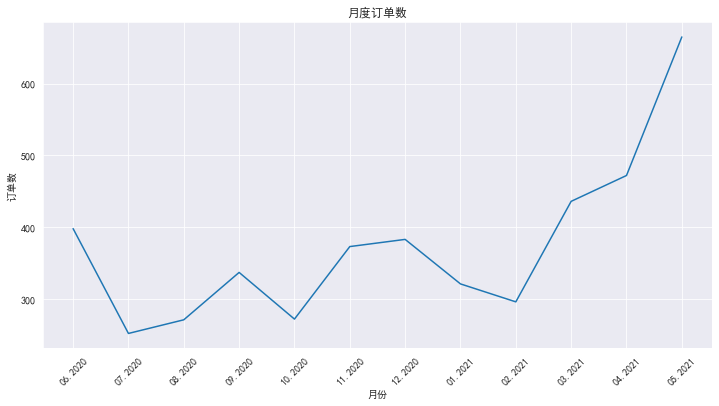

In [52]:
import matplotlib.pyplot as plt  #导入Matplotlib的pyplot模块

plt.rcParams['font.sans-serif']=['SimHei']

#构建月度的订单数的DataFrame
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True, figsize=(12, 6), legend=False)
ax.set_xlabel('月份')  # X轴label
ax.set_ylabel('订单数')  # Y轴Label
ax.set_title('月度订单数')  # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)),
    [x.strftime('%m.%Y') for x in df_orders_monthly.index],
    rotation=45)
plt.show()  # 绘图

### 数据清洗

In [53]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

### 特征工程

In [54]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


### 构建用户user表

In [55]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,产品说明掩码,6,18.00,15656,苏州,108.00
14565,545190,22722,2020-08-29 15:32:00,产品说明掩码,4,39.50,15656,苏州,158.00
14566,545190,22457,2020-08-29 15:32:00,产品说明掩码,60,3.00,15656,苏州,180.00
14567,545190,22464,2020-08-29 15:32:00,产品说明掩码,12,25.00,15656,苏州,300.00


In [56]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user.columns = ['用户码'] #设定字段名
df_user.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user = pd.merge(df_user, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user = pd.merge(df_user, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user #显示用户表结构

,用户码,R值,F值,M值
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


### 构建标签

In [57]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据
df_LTV = pd.merge(df_user, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV #显示df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


#### 创建特征集和标签集

In [58]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

,R值,F值,M值
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [59]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

### 拆分训练集、验证集和测试集

In [60]:
from sklearn.model_selection import train_test_split

# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, random_state = 36)
# 再把其它集拆分成验证集和测试集
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 36)

### 第一种缩放 标准化

In [61]:
from sklearn.preprocessing import StandardScaler #导入标准化缩放器

scaler = StandardScaler() #创建标准化缩放器
X_train_standard = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_standard = scaler.transform(X_valid) #转换验证集数据
X_test_standard = scaler.transform(X_test) #转换测试集数据

### 第二种缩放 归一化

In [62]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器

scaler = MinMaxScaler() #创建归一化缩放器
X_train_minmax = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_minmax = scaler.transform(X_valid) #转换验证集数据
X_test_minmax = scaler.transform(X_test) #转换测试集数据

### 选择算法创建模型

In [63]:
from sklearn.ensemble import RandomForestRegressor #导入随机森林回归模型

model_rfr = RandomForestRegressor() #创建随机森林回归模型
model_rfr_standard = RandomForestRegressor() #创建随机森林回归模型
model_rfr_minmax = RandomForestRegressor() #创建随机森林回归模型

### 训练模型

In [64]:
model_rfr.fit(X_train, y_train) #拟合随机森林模型
model_rfr_standard.fit(X_train_standard, y_train) #拟合随机森林模型
model_rfr_minmax.fit(X_train_minmax, y_train) #拟合随机森林模型

RandomForestRegressor()

### 评估模型

In [65]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块

y_valid_preds_rfr = model_rfr.predict(X_valid)
y_valid_preds_rfr_standard = model_rfr_standard.predict(X_valid_standard)
y_valid_preds_rfr_minmax = model_rfr_minmax.predict(X_valid_minmax)

print('验证集上的R平方分数-随机森林（无缩放）: %0.4f' % r2_score(y_valid, y_valid_preds_rfr))
print('验证集上的R平方分数-随机森林（标准化）: %0.4f' % r2_score(y_valid, y_valid_preds_rfr_standard))
print('验证集上的R平方分数-随机森林（归一化）: %0.4f' % r2_score(y_valid, y_valid_preds_rfr_minmax))

验证集上的R平方分数-随机森林（无缩放）: 0.5171
验证集上的R平方分数-随机森林（标准化）: 0.5208
验证集上的R平方分数-随机森林（归一化）: 0.5139


In [66]:
X_valid.iloc[2] #随便选择一个数据

R值       1.00
F值     153.00
M值    1413.83
Name: 163, dtype: float64

In [67]:
print('真值:', y_valid.iloc[2])  #线性回归模型预测值
print('随机森林（无缩放）预测值:', y_valid_preds_rfr[2])  #线性回归模型预测值
print('随机森林（标准化）预测值:', y_valid_preds_rfr_standard[2])  #决策树模型预测值
print('随机森林（归一化）预测值:', y_valid_preds_rfr_minmax[2]) #随机森林模型预测值

真值: 4391.94
随机森林（无缩放）预测值: 4704.034500000003
随机森林（标准化）预测值: 4476.173300000004
随机森林（归一化）预测值: 4557.181300000004


C:\ProgramLanguage\Anaconda3\envs\ml-gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


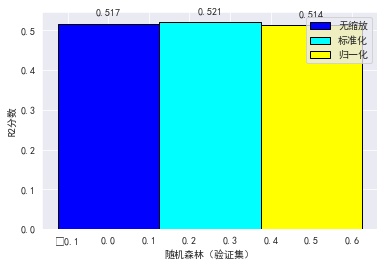

In [68]:
import numpy as np

fig, ax = plt.subplots()
width = 0.25

# 柱子数据

bars1 = [r2_score(y_valid, model_rfr.predict(X_valid))]
bars2 = [r2_score(y_valid, model_rfr_standard.predict(X_valid_standard))]
bars3 = [r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax))]

# 柱状图x轴位置
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]

# 柱状图
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='无缩放')
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='标准化')
plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='归一化')

# 布局
plt.ylabel('R2分数')
plt.xlabel('随机森林（验证集）')
plt.legend()

# 数值标签
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i/50+x[i], round(y[i], 3)+0.02, round(y[i], 3), ha = 'center')
addlabels(r1, bars1)
addlabels(r2, bars2)
addlabels(r3, bars3)

# 绘图
plt.show()